In [1]:
from random import sample, choice, randint
import numpy as np
import scipy
from collections import Counter
from math import log
import math
import matplotlib.pyplot as plt
%matplotlib inline

class Population:
    def __init__(self, PopSize):
        self.age = 0
        self.size = PopSize
        self.elements = range(self.size)
        self.unique_elements = Counter()
        for e in self.elements:
            self.unique_elements[e] += 1
        self.H_stat = [log(self.size)]
        self.N_stat = [self.size]
        self.unique_num = self.size    
    
    def entropy(self):
        H = 0
        N = 0
        for val in self.unique_elements.values():
            if val > 0:
                H -= val * log(val)
                N += val
        H /= N
        H += log(N)
        return H
   
    def small_step(self):
        a, b = sample(xrange(self.size), 2)
        self.unique_elements[self.elements[a]] +=1
        self.unique_elements[self.elements[b]] -=1
        if self.unique_elements[self.elements[b]] == 0:
            self.unique_num -= 1
            self.unique_elements += Counter()
        self.elements[b] = self.elements[a]
        self.H_stat.append(self.entropy())
        self.N_stat.append(self.unique_num)

    def generation(self):
        self.age += 1
        new_elements = []
        for _ in xrange(self.size):
            new_elements.append(choice(self.elements))
        self.elements = new_elements
        self.unique_elements = Counter()
        for e in self.elements:
            self.unique_elements[e] += 1
        self.H_stat.append(self.entropy())
        self.unique_num = len(self.unique_elements.keys())
        self.N_stat.append(self.unique_num)
        

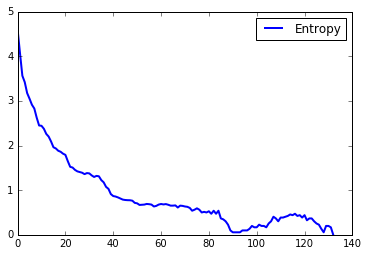

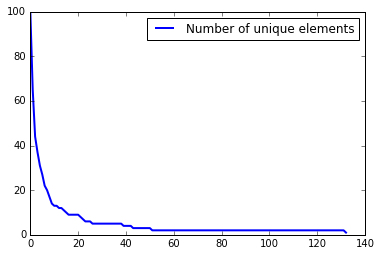

In [2]:

p1 = Population(100)

while p1.unique_num > 1:
    p1.generation()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(p1.H_stat)), p1.H_stat, color='blue', linewidth=2, label="Entropy")
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(p1.N_stat)), p1.N_stat, color='blue', linewidth=2, label="Number of unique elements")
ax.legend()
plt.show()

Ускоренная симуляция

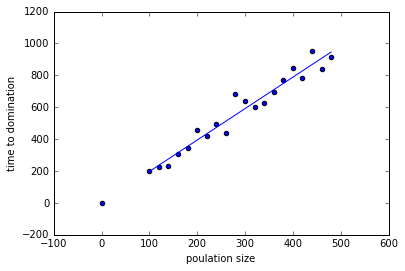

1.9714283974


In [3]:
fig = plt.figure()
plt.xlabel('poulation size')
plt.ylabel('time to domination')
plt.scatter(0,0)
slopes = []
pop_sizes = np.arange(100,500,20)
for n in pop_sizes:
    ages = []
    for _ in xrange(50):
        p = set(range(1,n+1))
        t = 0
        while len(p) > 1:
            t += 1
            p = set([randint(1,n) for elem in p]) 
        ages.append(t)
    slopes.append(float(np.mean(ages))/n)
    plt.scatter(n,np.mean(ages))

plt.plot(pop_sizes, np.mean(slopes) * pop_sizes)
plt.show()
print np.mean(slopes)

1.9996452


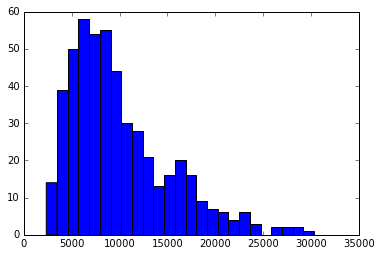

In [4]:
ages = []
n = 5000
for _ in xrange(500):
    p = set(range(1,n+1))
    t = 0
    while len(p) > 1:
        t += 1
        p = set([randint(1,n) for elem in p]) 
    ages.append(t)
plt.hist(ages, bins = 25)
print float(np.mean(ages))/n